<a href="https://colab.research.google.com/github/Praveen8824/machine-learning-projects/blob/main/Emission_prediction_in_automobiles_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# import data from google drive
# data file will be there in g drive
# click on google drive symbol on left blade
# connect your notebook ( cross sign will appear on google drive symbol)
# refresh the left blade by refreh icon then drive folder will appper
# click on drive folder and locate your data set and click on 3 dots
# copy the path

df = pd.read_csv('/content/drive/MyDrive/Parul University/Parul University || Essential of ML/ML code || shared with Student/AllDataSet/Emission.csv')

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe() # its give you only numeric column data
#  in ML we need to capture on numeric column

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
# capture numeric column
df.describe().columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
# simple linear regression : one feature + one outcome
# Multiple linear regression : multiple feature + one outcome

## **EDA**

In [ ]:
# Histogram
'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'

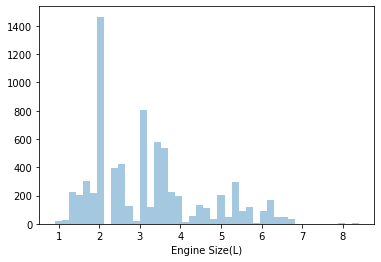

In [ ]:
sns.distplot(df['Engine Size(L)'],kde=False)

In [ ]:
# conclusion : we have 1400+ records which have the 2 engine size

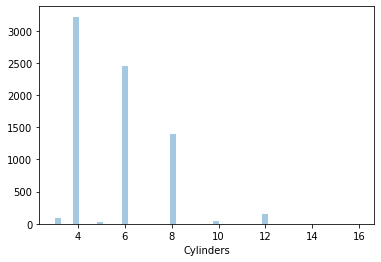

In [ ]:
sns.distplot(df['Cylinders'],kde=False)

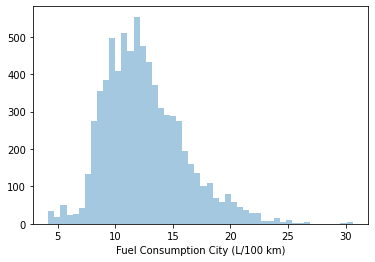

In [ ]:
sns.distplot(df['Fuel Consumption City (L/100 km)'],kde=False)

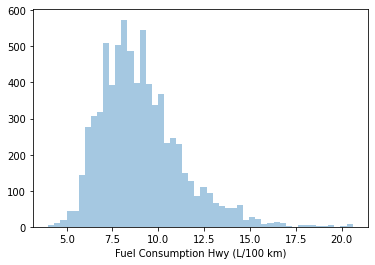

In [ ]:
sns.distplot(df['Fuel Consumption Hwy (L/100 km)'],kde=False)

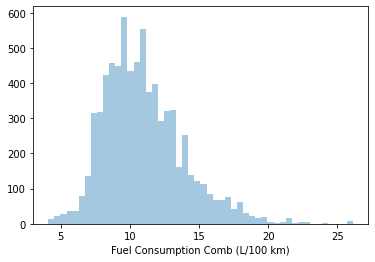

In [ ]:
sns.distplot(df['Fuel Consumption Comb (L/100 km)'],kde=False)

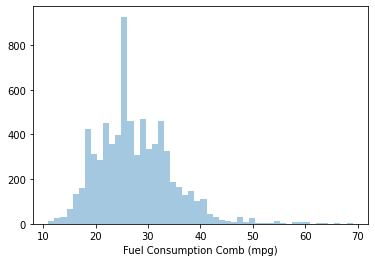

In [ ]:
sns.distplot(df[ 'Fuel Consumption Comb (mpg)'],kde=False)

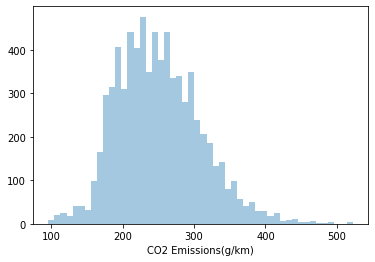

In [ ]:
sns.distplot(df[  'CO2 Emissions(g/km)'],kde=False)

In [ ]:
# some work on categorical column : string (object data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# we cant how many makes are there what are the frequency
df.Make.value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

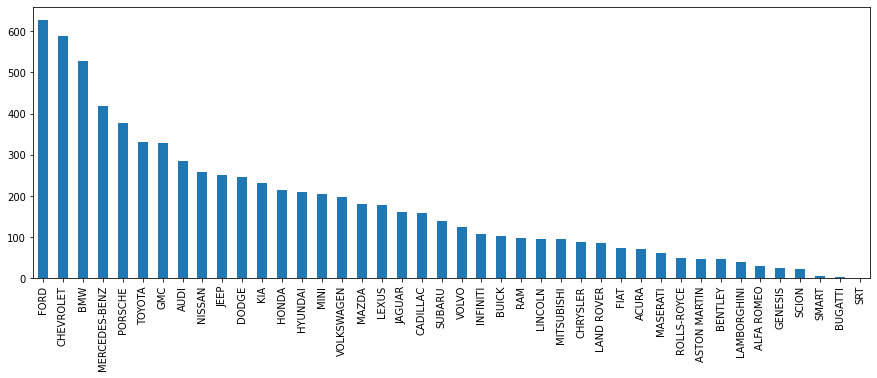

In [ ]:
plt.figure(figsize=(15,5))
df.Make.value_counts().plot.bar()

In [ ]:
df.Model.value_counts().head()

F-150 FFV 4X4    32
F-150 FFV        32
MUSTANG          27
FOCUS FFV        24
SONIC            20
Name: Model, dtype: int64

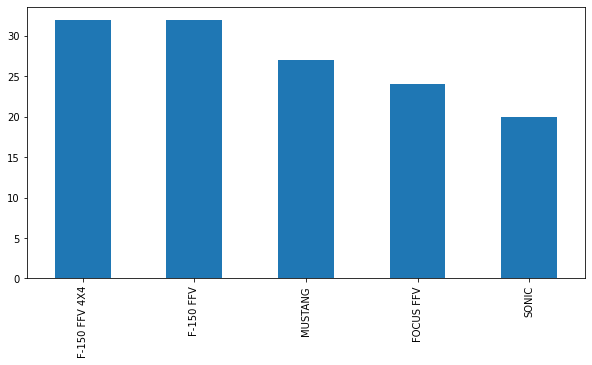

In [ ]:
plt.figure(figsize=(10,5))
df.Model.value_counts().head().plot.bar()

In [ ]:
df['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

In [ ]:
# regression plot ( Numeric colmn)
'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'

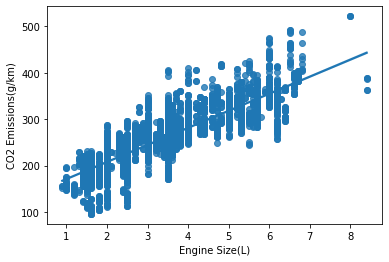

In [ ]:
sns.regplot(x ='Engine Size(L)', y ='CO2 Emissions(g/km)', data=df)

In [ ]:
# conclusion : if we increasing the Engine size , then emmision will increase

## Single Linear **Regression**

In [ ]:
x = df[['Engine Size(L)']] # feature
y = df[['CO2 Emissions(g/km)']] # outcome

In [ ]:
x.head()

,Engine Size(L)
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [ ]:
y.head()

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244


In [ ]:
# train test split
x_train1, x_test1,y_train1,y_test1= train_test_split(x,y,test_size=0.3,random_state=9)

In [ ]:
# load the model
model1 = LinearRegression()
model1.fit(x_train1,y_train1) # training

LinearRegression()

In [ ]:
pred1 = model1.predict(x_test1)

In [ ]:
pred1

array([[226.01112743],
       [189.24015271],
       [207.62564007],
       ...,
       [185.56305524],
       [226.01112743],
       [328.96985664]])

In [ ]:
model1.predict([[5.6]])[0][0]

340.0011490573819

In [ ]:
print('Expected Emmision base on engine size : ', model1.predict([[5]])[0][0], ' (g/km)')

Expected Emmision base on engine size :  317.9385642261035  (g/km)


In [ ]:
# Model Eveluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error : ', mean_absolute_error(y_test1,pred1))
print('Mean Squared Error : ', mean_squared_error(y_test1,pred1))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test1,pred1)))
print('Accuracy : ', r2_score(y_test1,pred1)*100,' %')

Mean Absolute Error :  23.063444105314407
Mean Squared Error :  945.7694540992311
Root Mean Squared Error :  30.753364923195495
Accuracy :  73.15028526785147  %


### **Multi Linear Regression**

In [ ]:
x_new = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']]

y_new = df[['CO2 Emissions(g/km)']]

In [ ]:
# train test split
x_train2, x_test2,y_train2,y_test2= train_test_split(x_new,y_new,test_size=0.3,random_state=9)

In [ ]:
x_train2.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
3485,3.6,6,15.0,10.3,12.8,22
3360,3.0,6,13.3,9.1,11.4,25
4222,3.6,6,12.9,9.7,11.5,25
6311,3.0,6,12.7,9.0,11.0,26
2349,4.4,8,16.6,12.1,14.6,19


In [ ]:
x_train2.size

31014

In [ ]:
# load the model
model2 = LinearRegression()
model2.fit(x_train2,y_train2) # training

LinearRegression()

In [ ]:
pred2 = model2.predict(x_test2)

In [ ]:
pred2

array([[246.00975797],
       [202.60265137],
       [204.02688612],
       ...,
       [194.40483186],
       [237.69348248],
       [318.44151444]])

In [ ]:
# Model Eveluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error : ', mean_absolute_error(y_test2,pred2))
print('Mean Squared Error : ', mean_squared_error(y_test2,pred2))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test2,pred2)))
print('Accuracy : ', r2_score(y_test2,pred2))

Mean Absolute Error :  11.900181640157202
Mean Squared Error :  348.33023409058234
Root Mean Squared Error :  18.663607210038
Accuracy :  0.9011115512625408


In [ ]:
# How to change column data type
profit = pd.read_csv('/content/drive/MyDrive/Parul University/Parul University || Essential of ML/ML code || shared with Student/AllDataSet/Profit.csv')

In [ ]:
profit.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#astype
profit.Profit = profit.Profit.astype('int') # float , object

In [ ]:
profit.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261
1,162597.70,151377.59,443898.53,California,191792
2,153441.51,101145.55,407934.54,Florida,191050
3,144372.41,118671.85,383199.62,New York,182901
4,142107.34,91391.77,366168.42,Florida,166187
